<h1><center>INCOME PREDICTION</center></h1>        

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
data = pd.read_csv("incomeData.csv")

In [4]:
data.head(3)

,nan,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [5]:
data.shape

(32561, 15)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   nan             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
data.isnull().sum()

nan               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

In [8]:
data.duplicated().sum()

24

In [9]:
data.drop_duplicates(inplace=True)

In [10]:
data.duplicated().sum()

0

In [11]:
data.dtypes

nan                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
Income            object
dtype: object

In [12]:
data.rename(columns={'nan':'age'},inplace=True)

In [13]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Income'],
      dtype='object')

In [14]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [15]:
data['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [16]:
corr_inc = data[['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']].corr()

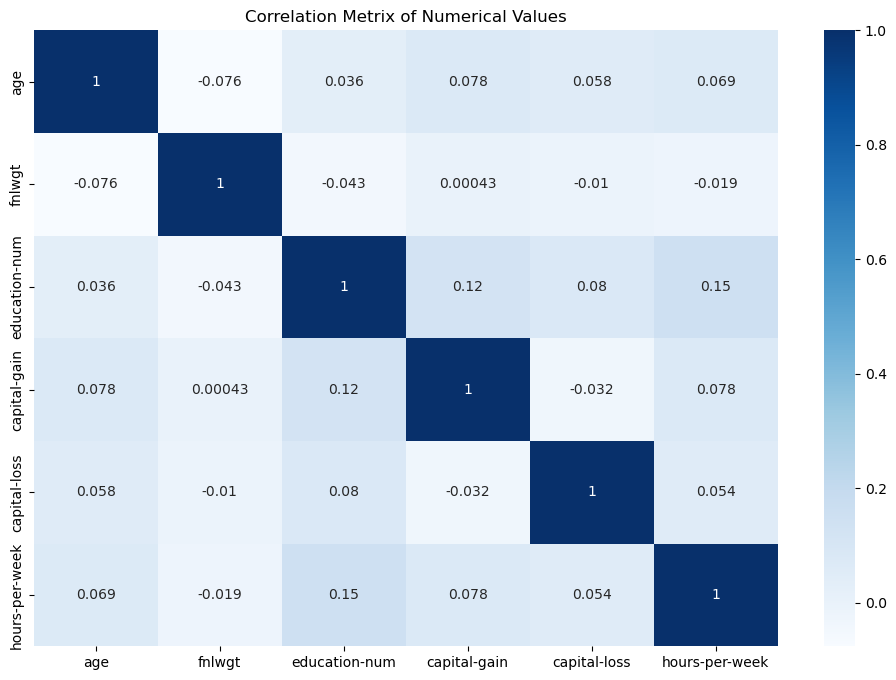

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_inc,cbar=True,annot=True,cmap='Blues') #coolwarm,reds,Blues,greens,viridis
plt.title('Correlation Metrix of Numerical Values')
plt.show()

#### There is no much correlation between any of the numerical features

## Check for error values

In [18]:
data['age'].unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87], dtype=int64)

In [19]:
data['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [20]:
data['fnlwgt'].unique()

array([ 77516,  83311, 215646, ...,  34066,  84661, 257302], dtype=int64)

In [21]:
data['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [22]:
data['education-num'].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)

In [23]:
data['marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [24]:
data['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [25]:
data['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [26]:
data['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [27]:
data['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [28]:
data['capital-gain'].unique()

array([ 2174,     0, 14084,  5178,  5013,  2407, 14344, 15024,  7688,
       34095,  4064,  4386,  7298,  1409,  3674,  1055,  3464,  2050,
        2176,   594, 20051,  6849,  4101,  1111,  8614,  3411,  2597,
       25236,  4650,  9386,  2463,  3103, 10605,  2964,  3325,  2580,
        3471,  4865, 99999,  6514,  1471,  2329,  2105,  2885, 25124,
       10520,  2202,  2961, 27828,  6767,  2228,  1506, 13550,  2635,
        5556,  4787,  3781,  3137,  3818,  3942,   914,   401,  2829,
        2977,  4934,  2062,  2354,  5455, 15020,  1424,  3273, 22040,
        4416,  3908, 10566,   991,  4931,  1086,  7430,  6497,   114,
        7896,  2346,  3418,  3432,  2907,  1151,  2414,  2290, 15831,
       41310,  4508,  2538,  3456,  6418,  1848,  3887,  5721,  9562,
        1455,  2036,  1831, 11678,  2936,  2993,  7443,  6360,  1797,
        1173,  4687,  6723,  2009,  6097,  2653,  1639, 18481,  7978,
        2387,  5060], dtype=int64)

In [29]:
data['capital-loss'].unique()

array([   0, 2042, 1408, 1902, 1573, 1887, 1719, 1762, 1564, 2179, 1816,
       1980, 1977, 1876, 1340, 2206, 1741, 1485, 2339, 2415, 1380, 1721,
       2051, 2377, 1669, 2352, 1672,  653, 2392, 1504, 2001, 1590, 1651,
       1628, 1848, 1740, 2002, 1579, 2258, 1602,  419, 2547, 2174, 2205,
       1726, 2444, 1138, 2238,  625,  213, 1539,  880, 1668, 1092, 1594,
       3004, 2231, 1844,  810, 2824, 2559, 2057, 1974,  974, 2149, 1825,
       1735, 1258, 2129, 2603, 2282,  323, 4356, 2246, 1617, 1648, 2489,
       3770, 1755, 3683, 2267, 2080, 2457,  155, 3900, 2201, 1944, 2467,
       2163, 2754, 2472, 1411], dtype=int64)

In [30]:
data['hours-per-week'].unique()

array([40, 13, 16, 45, 50, 80, 30, 35, 60, 20, 52, 44, 15, 25, 38, 43, 55,
       48, 58, 32, 70,  2, 22, 56, 41, 28, 36, 24, 46, 42, 12, 65,  1, 10,
       34, 75, 98, 33, 54,  8,  6, 64, 19, 18, 72,  5,  9, 47, 37, 21, 26,
       14,  4, 59,  7, 99, 53, 39, 62, 57, 78, 90, 66, 11, 49, 84,  3, 17,
       68, 27, 85, 31, 51, 77, 63, 23, 87, 88, 73, 89, 97, 94, 29, 96, 67,
       82, 86, 91, 81, 76, 92, 61, 74, 95], dtype=int64)

In [31]:
data['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [32]:
data['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

There are missing values in three columns ['workclass'], ['occupation'] and ['native-country']

## Treating the error values

In [33]:
data['workclass'].replace(' ?',np.nan,inplace=True);

C:\Users\Jilna K\AppData\Local\Temp\ipykernel_1652\926425931.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['workclass'].replace(' ?',np.nan,inplace=True);


In [34]:
data['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', nan, ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [35]:
data['workclass'].isnull().sum()

1836

In [36]:
data['workclass'].fillna(data['workclass'].mode()[0],inplace=True)

C:\Users\Jilna K\AppData\Local\Temp\ipykernel_1652\1956132327.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['workclass'].fillna(data['workclass'].mode()[0],inplace=True)


In [37]:
data['workclass'].isnull().sum()

0

In [38]:
data['occupation'].replace(' ?',np.nan,inplace=True);

C:\Users\Jilna K\AppData\Local\Temp\ipykernel_1652\2561297202.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['occupation'].replace(' ?',np.nan,inplace=True);


In [39]:
data['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', nan, ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [40]:
data['occupation'].isnull().sum()

1843

In [41]:
data['occupation'].fillna(data['workclass'].mode()[0],inplace=True)

C:\Users\Jilna K\AppData\Local\Temp\ipykernel_1652\3109541887.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['occupation'].fillna(data['workclass'].mode()[0],inplace=True)


In [42]:
data['occupation'].isnull().sum()

0

In [43]:
data['native-country'].replace(' ?',np.nan,inplace=True);

C:\Users\Jilna K\AppData\Local\Temp\ipykernel_1652\2946898267.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['native-country'].replace(' ?',np.nan,inplace=True);


In [44]:
data['native-country'].isnull().sum()

582

In [45]:
data['native-country'].fillna(data['workclass'].mode()[0],inplace=True)

C:\Users\Jilna K\AppData\Local\Temp\ipykernel_1652\3864517643.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['native-country'].fillna(data['workclass'].mode()[0],inplace=True)


In [46]:
data['native-country'].isnull().sum()

0

## Univariate Analysis

### Income Distribution

C:\Users\Jilna K\AppData\Local\Temp\ipykernel_1652\963895705.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x='Income',palette='BuGn_r')


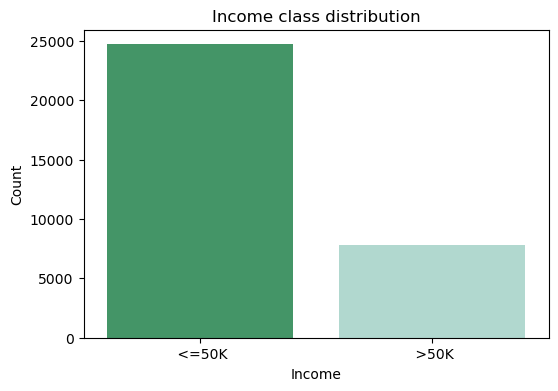

In [47]:
# income class distribution
plt.figure(figsize=(6,4))
sns.countplot(data=data,x='Income',palette='BuGn_r')
plt.title("Income class distribution")
plt.xlabel("Income")
plt.ylabel("Count")
plt.show()

* The dataset is imbalanced, with a significantly higher number of individuals earning <=50K.

### Impact of Education 

C:\Users\Jilna K\AppData\Local\Temp\ipykernel_1652\2815386504.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data['education'],palette='Set2')


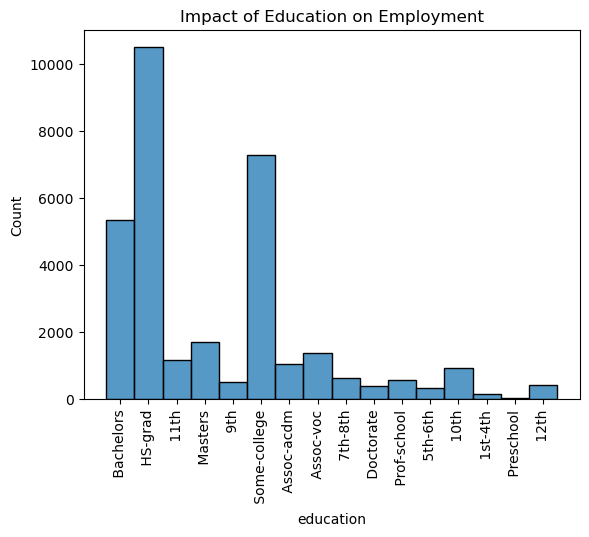

In [48]:
# impact of education on employment
sns.histplot(data['education'],palette='Set2')
plt.xticks(rotation=90)
plt.title("Impact of Education on Employment")
plt.show()

* There is a great variation in number of employees based on their education.
* More than 10000 employees are HS-Graduates.

### Number of employees in each sector

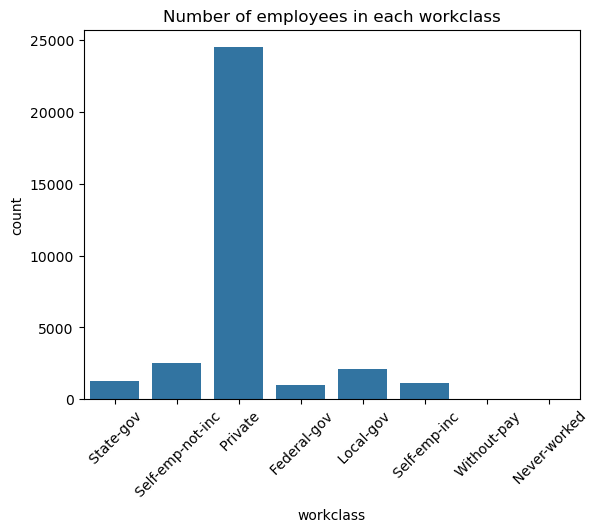

In [49]:
#Analysing employment opertunities in each sector
sns.countplot(x=data['workclass'])
plt.xticks(rotation=45)
plt.title("Number of employees in each workclass")
plt.show()

* Private sectors are providing more employment opertunities.

In [50]:
#Getting information about peoples having high income
income_high=data[data['Income']==" >50K"]

In [51]:
income_high

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32539,71,Private,287372,Doctorate,16,Married-civ-spouse,Private,Husband,White,Male,0,0,10,United-States,>50K
32545,39,Local-gov,111499,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


### Work class distribution on high income

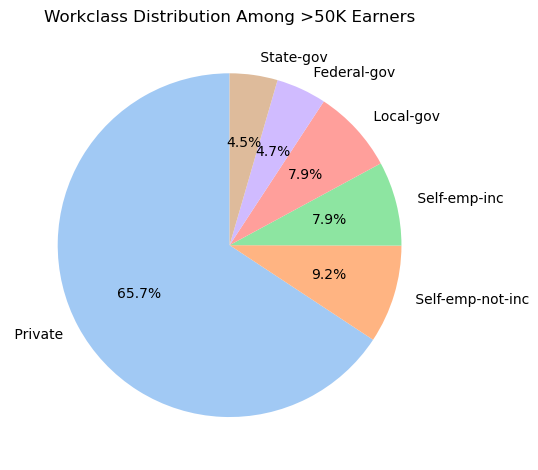

In [53]:
#Analysing work class of high income individuals
highworkclass=income_high['workclass'].value_counts()
plt.pie(highworkclass,labels=highworkclass.index, autopct='%1.1f%%', startangle=90,colors=sns.color_palette('pastel'))
plt.title("Workclass Distribution Among >50K Earners")
plt.tight_layout()
plt.show()

* Most high-income individuals belong to Private, Self-employed, or Government sectors.
* Private sector is likely dominant, reflecting broader employment trends.
* Workclass type clearly influences income potential, possibly tied to benefits, job roles, or access to higher salaries.



In [54]:
#filtering low income individuals
low_income=data[data['Income'] == ' <=50K']
low_income

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32553,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


### Work class distribution on low income

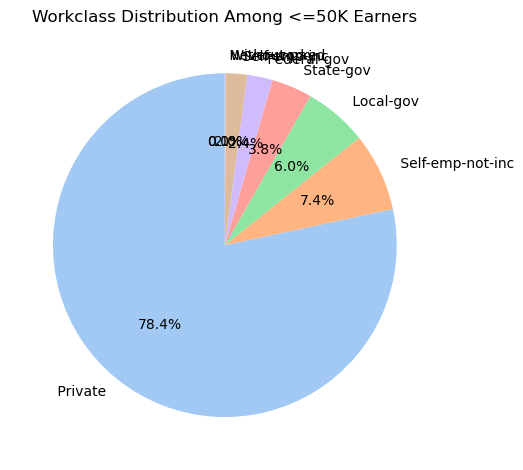

In [55]:
#Analysing work class of low income individuals
lowworkclass=low_income['workclass'].value_counts()
plt.pie(lowworkclass,labels=lowworkclass.index, autopct='%1.1f%%', startangle=90,colors=sns.color_palette('pastel'))
plt.title("Workclass Distribution Among <=50K Earners")
plt.tight_layout()
plt.show()

* Most low-income individuals belong to Private, Self-employed, or Government sectors.
* Private sector is likely dominant, reflecting broader employment trends.

In [56]:
data['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' Private', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

### Occupation of high income individuals

C:\Users\Jilna K\AppData\Local\Temp\ipykernel_1652\3160530741.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=income_high['occupation'],palette='pastel')


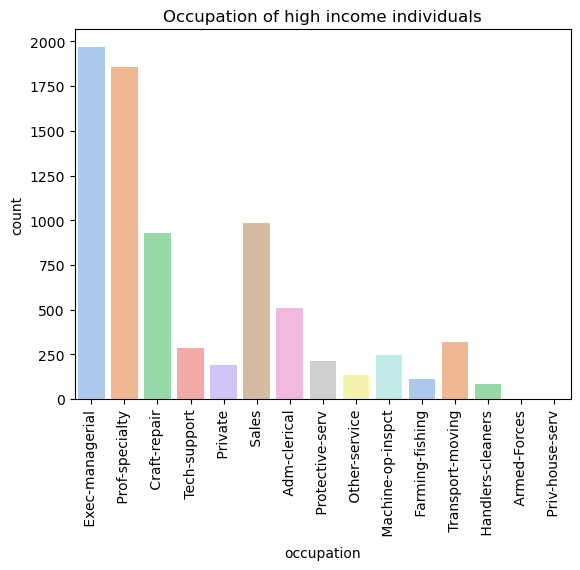

In [57]:

sns.countplot(x=income_high['occupation'],palette='pastel')
plt.xticks(rotation=90)
plt.title("Occupation of high income individuals") 
plt.show()

* Most high-income individuals are working as Executive-manager, prof-specialty,craft repair or sales
* Executive-manager is likely dominant.
* Ocuupation of employees influences the income of individuals

### Age Distribution Across Income Groups

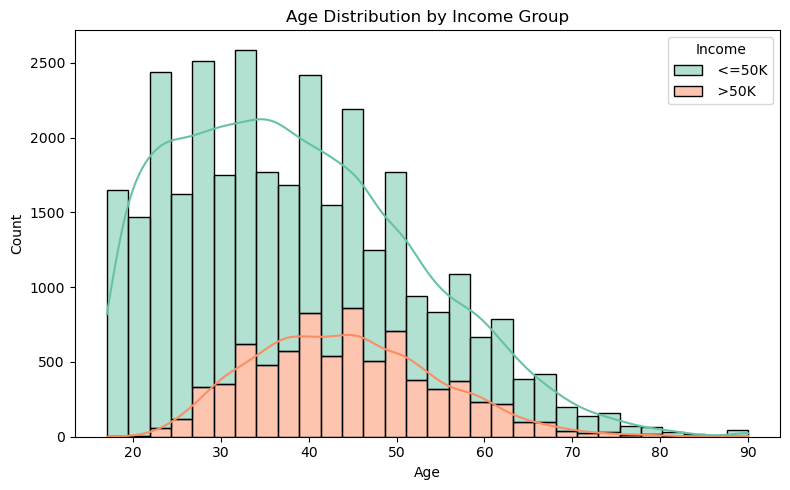

In [60]:
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='age', hue='Income', kde=True, bins=30, palette='Set2', multiple='stack')
plt.title('Age Distribution by Income Group')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

* Higher income ( >50K ) is more common among people aged 35–55.
* People earning ≤50K are spread more broadly across ages, including younger demographics.
* This suggests age is a significant predictor of income level — potentially nonlinear in influence.

#### Education Level Distribution by Income

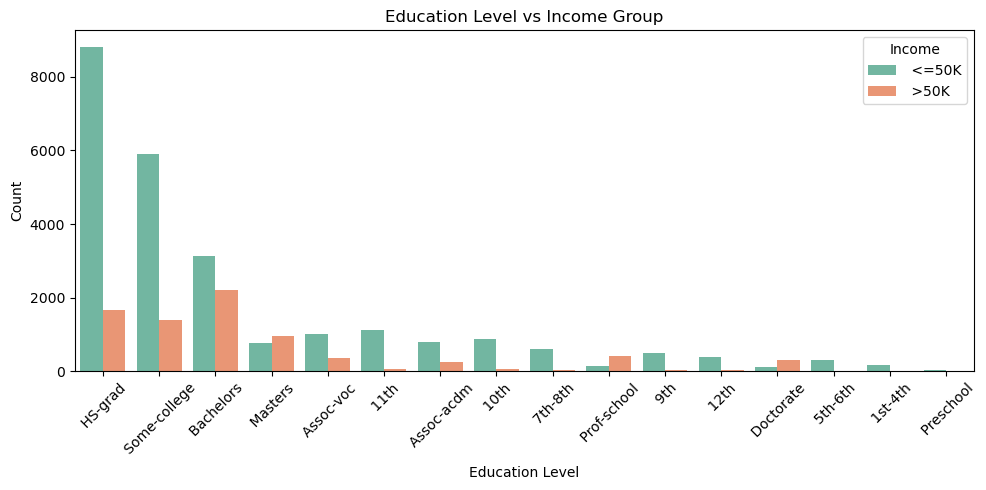

In [62]:
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='education', hue='Income', order=data['education'].value_counts().index, palette='Set2')
plt.title('Education Level vs Income Group')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* Individuals with Bachelors, Masters, and Doctorate degrees have a higher proportion of >50K income.
* Lower education levels (like HS-grad, Some-college, or 11th) are mostly associated with ≤50K income.
* Education is a strong determinant of income, and can be a powerful feature for predictive modeling.

#### Occupation vs Income

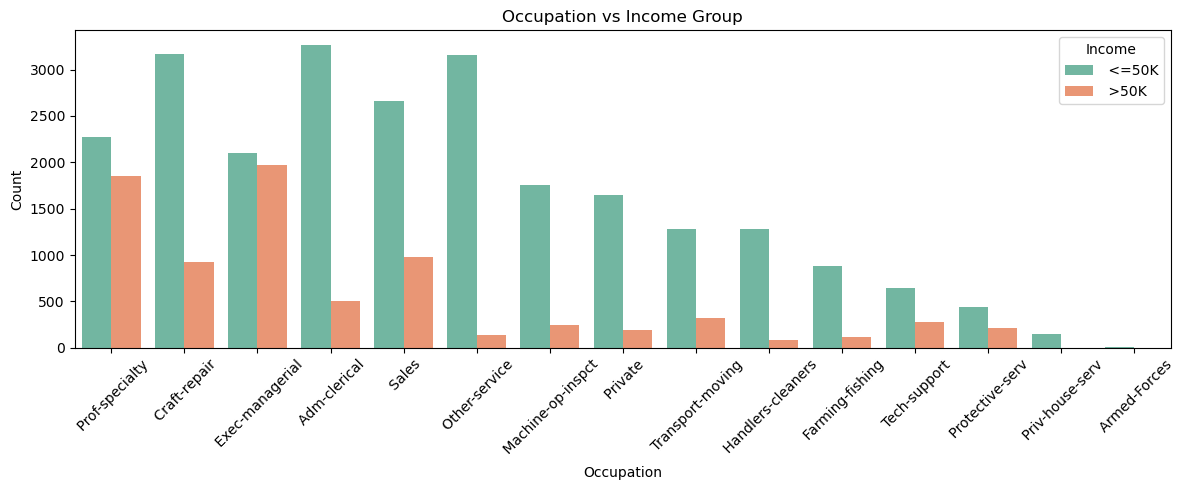

In [63]:
plt.figure(figsize=(12, 5))
sns.countplot(data=data, x='occupation', hue='Income', order=data['occupation'].value_counts().index, palette='Set2')
plt.title('Occupation vs Income Group')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* Occupations such as Exec-managerial, Prof-specialty, and craft-repair and sales have higher proportions of >50K earners.
* Roles like Handlers-cleaners, Machine-op-inspct, and Other-service are dominated by ≤50K earners.
* This confirms that occupation is highly correlated with income class and is a strong predictive feature.

#### Boxplot of Hours Worked per Week by Income Group

C:\Users\Jilna K\AppData\Local\Temp\ipykernel_1652\2154854418.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Income', y='hours-per-week', palette='Set2')


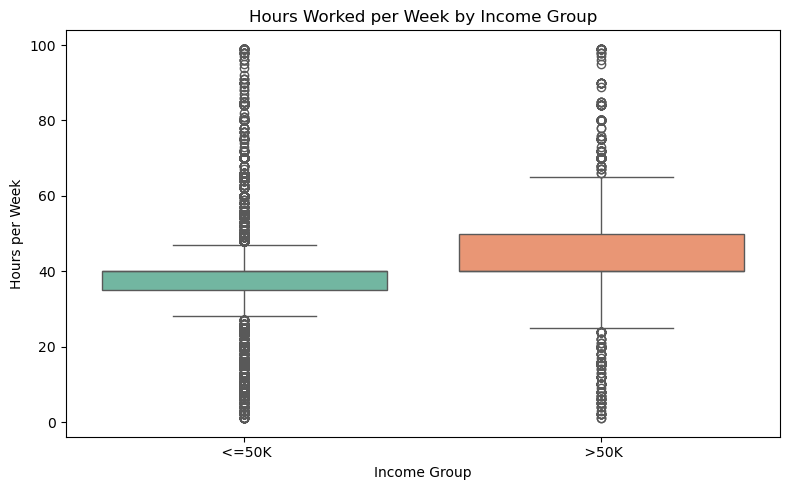

In [65]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x='Income', y='hours-per-week', palette='Set2')
plt.title('Hours Worked per Week by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Hours per Week')
plt.tight_layout()
plt.show()

* Median hours worked for both income groups is around 40 hours.
* High-income earners have a wider range and more outliers (some working 60–80+ hours).
* Low-income group shows a tighter, more consistent spread.
* This suggests more hours doesn't guarantee higher income, but many high earners do work longer hours.

## Conclusion

* Higher number of individuals are earning <=50k salary.
* Private sectors are providing more employment opertunities for individuals.They provide both high income and low income jobs.
* Most high-income individuals are working as Executive-manager, prof-specialty,craft repair or sales.
* Higher income ( >50K ) is more common among people aged 35–55.
* Individuals with Bachelors, Masters, and Doctorate degrees have a higher proportion of >50K income.
* Lower education levels (like HS-grad, Some-college, or 11th) are mostly associated with ≤50K income.
* Education is a strong determinant of income, and can be a powerful feature for predictive modeling.
* More hours doesn't guarantee higher income, but many high earners do work longer hours.
